In [1]:
import numpy as np
import scipy.special as ss
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tk
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
r_alpha = np.arange (0.0, 10.0, 0.001)
xi = r_alpha ** 2 / 8.0

bc_v_z = 1.0 / (4.0 * np.pi) * exp (-r_alpha ** 2 / 4.0)
sig_z = -1.0 / (4.0 * np.sqrt (np.pi)) * np.exp (-xi) * ((1.0 - 2.0 * xi) * ss.iv (0, xi) + 2.0 * xi * ss.iv (1, xi))

bc_sig_z = -1.0 / (4.0 * np.pi) * exp (-r_alpha ** 2 / 4.0)
v_z = 1.0 / (8.0 * np.sqrt (np.pi)) * np.exp (-xi) * ss.iv (0, xi)

#F_z = 8.0 * np.pi ** 1.5 * np.exp (-xi) * xi * (ss.iv (0, xi) - ss.iv (1, xi))

In [3]:
#plot (r_alpha, F_z)

In [4]:
#chi = -8.0 / 6.0 * np.pi ** 0.5 * np.exp (xi) * xi * (ss.iv (0, xi) + ss.iv (1, xi))

In [5]:
mpl.rcParams['xtick.labelsize'] = 42
mpl.rcParams['ytick.labelsize'] = 42

mpl.rcParams['xtick.major.pad'] = 15
mpl.rcParams['ytick.major.pad'] = 8

mpl.rcParams['xtick.major.size'] = 12
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.size'] = 8
mpl.rcParams['xtick.minor.width'] = 1

mpl.rcParams['ytick.major.size'] = 14
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.size'] = 8
mpl.rcParams['ytick.minor.width'] = 1

mpl.rc('font',**{'family':'Cabin'})
mpl.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']

color_gray = (0.4, 0.4, 0.4)
label_font_size = 68
line_width = 6

<Figure size 432x288 with 0 Axes>

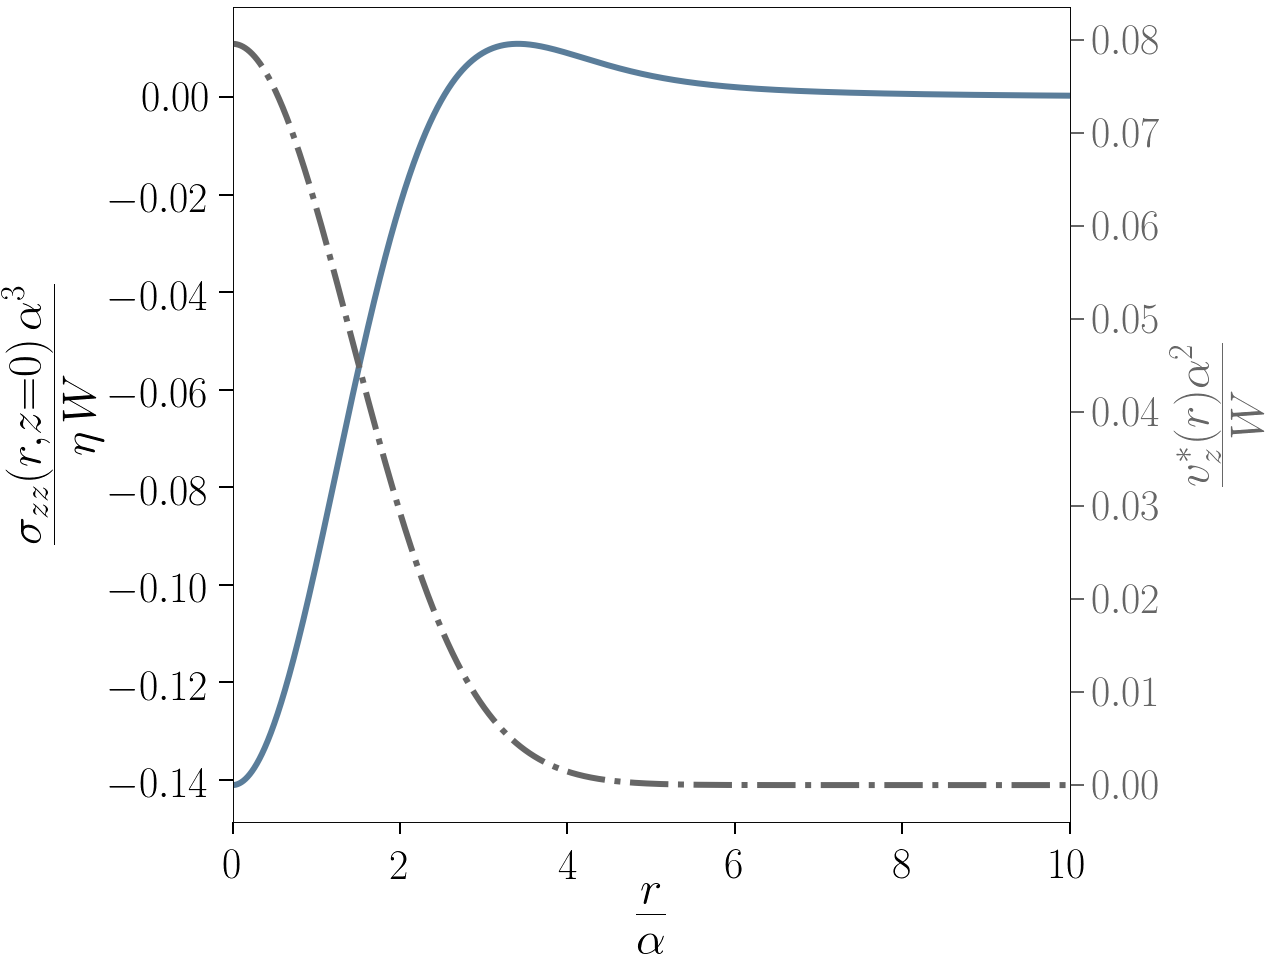

In [6]:
plt.figure ()

fig, ax1 = plt.subplots (figsize = (15, 15))

ax1.plot (r_alpha, sig_z, linewidth = line_width, color='xkcd:steel blue')

ax1.set_xlabel(r'$\frac{r}{\alpha}$',fontsize = label_font_size, labelpad = 10)
ax1.set_ylabel(r'$\frac{\sigma_{zz}\left(r, z=0 \right) \, \alpha^3}{\eta \, W}$',fontsize = label_font_size, labelpad = 0)
ax1.tick_params('y', colors='black')

ax1.set_xlim (0.0, 10.0)
#ax1.grid(axis='both')

ax2 = ax1.twinx ()

ax2.plot (r_alpha, bc_v_z, color= color_gray, linewidth = line_width, linestyle='-.')
ax2.set_ylabel(r'$\frac{v^{*}_{z}\left(r\right) \alpha ^ 2}{W}$',fontsize = label_font_size, labelpad = 25, color= color_gray)
ax2.tick_params('y', colors= color_gray)
ax2.set_xlim (0.0, 10.0)

#plt.savefig(r'/storage/mi/sadeghi/Dropbox/FU Berlin/Results/Hydrodynamic Interaction/single_planar_sig_z.pdf',
#            format = 'pdf', bbox_inches='tight', pad_inches = 0.5, transparent = True, dpi = 300)

plt.savefig(r'/srv/public/Dropbox/FU Berlin/Publications/Hydrodynamics and kinetics of membranes/paper_SadeghiNoe_MembraneKinetics_detailed/manuscript_ver_1/figures/planar_single_stress.pdf',
            format = 'pdf', bbox_inches='tight', pad_inches = 0.5, transparent = True, dpi = 300)

<Figure size 432x288 with 0 Axes>

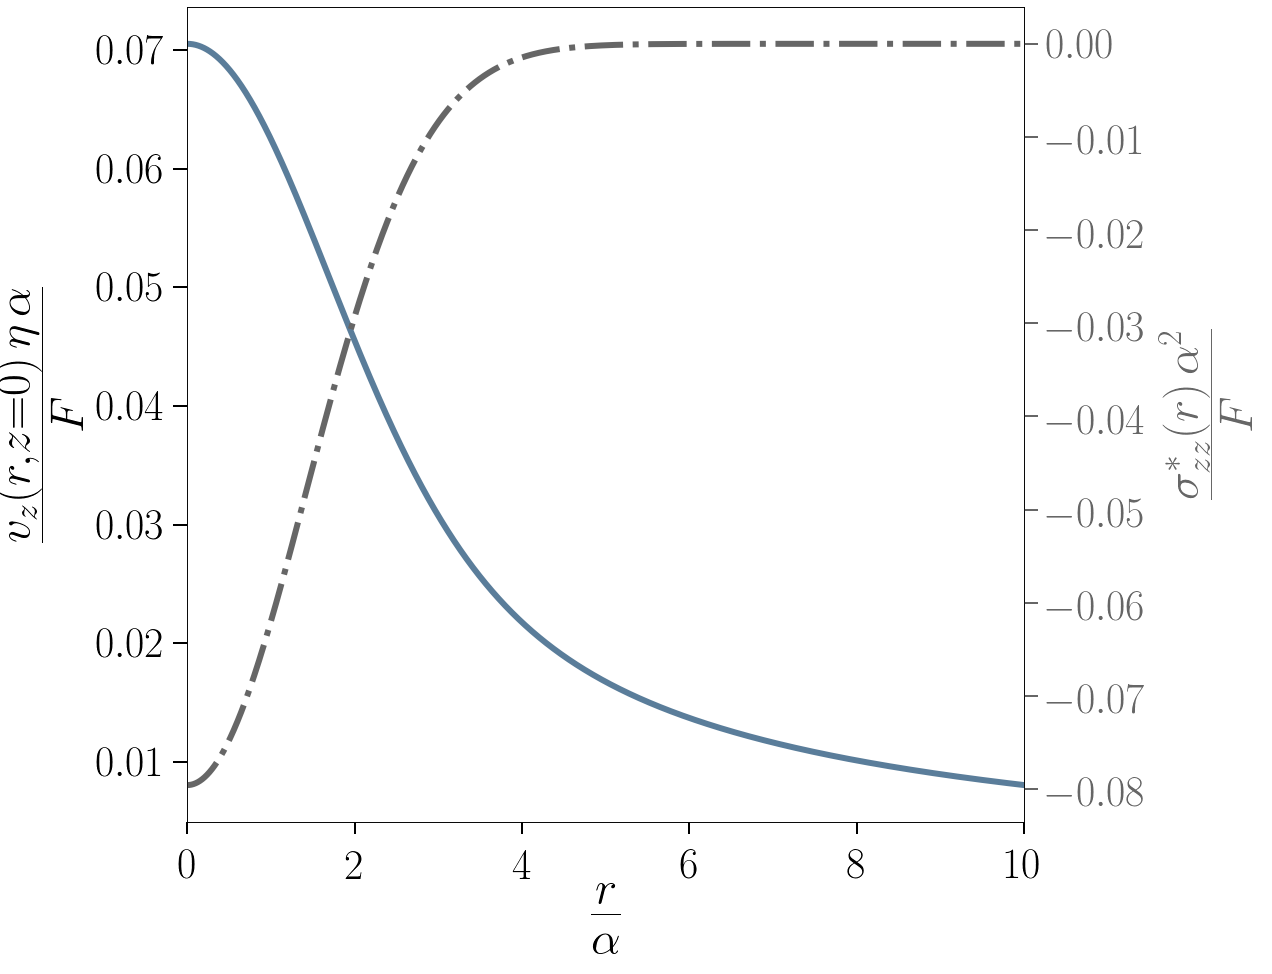

In [7]:
plt.figure ()

fig, ax1 = plt.subplots (figsize = (15, 15))

ax1.plot (r_alpha, v_z, linewidth = line_width, color="xkcd:steel blue")

ax1.set_xlabel(r'$\frac{r}{\alpha}$',fontsize = label_font_size, labelpad = 10)
ax1.set_ylabel(r'$\frac{v_{z}\left(r, z=0 \right)\,\eta \, \alpha}{F}$',fontsize = label_font_size, labelpad = 0, color = 'black')
ax1.tick_params('y', colors='black')

ax1.set_xlim (0.0, 10.0)
#ax1.grid(axis='both')

ax2 = ax1.twinx ()

ax2.plot (r_alpha, bc_sig_z, color= color_gray, linewidth = line_width, linestyle='-.')
ax2.set_ylabel(r'$\frac{\sigma_{zz}^{*}\left(r\right)\,\alpha^2}{F}$',fontsize = label_font_size, labelpad = 25, color = color_gray)
ax2.tick_params('y', colors= color_gray)
ax2.set_xlim (0.0, 10.0)

#plt.savefig(r'/storage/mi/sadeghi/Dropbox/FU Berlin/Results/Hydrodynamic Interaction/single_planar_v_z.pdf',
#            format = 'pdf', bbox_inches='tight', pad_inches = 0.5, transparent = True, dpi = 300)

plt.savefig(r'/srv/public/Dropbox/FU Berlin/Publications/Hydrodynamics and kinetics of membranes/paper_SadeghiNoe_MembraneKinetics_detailed/manuscript_ver_1/figures/planar_single_velocity.pdf',
            format = 'pdf', bbox_inches='tight', pad_inches = 0.5, transparent = True, dpi = 300)

In [9]:
#coordination number
n_c = 6
#lattice parameter
d = 10.0
alpha = 0.3 * d

N = 16
r_p = np.zeros (N, dtype = np.float64)
#integrated over the rings
f_p = np.zeros (N - 1, dtype = np.float64)
#assumed constant over the area
f_c = np.zeros (N - 1, dtype = np.float64)

S = n_c * d * d * np.sin (np.pi / float(n_c)) / (16.0 * np.cos (np.pi / float(n_c)) ** 3)

r_p[0] = 0.0
r_p[1] = 0.5 * d

for i in range(2, N):
    r_p[i] = r_p[i - 1] + d

xi_p = - r_p ** 2 / (8.0 * alpha ** 2)

for i in range(N - 1):
    n_neighbor = np.floor (2.0 * np.pi * 0.5 * (r_p[i + 1] + r_p[i]) / d)

    f_p[i] = -8.0 * np.pi ** 1.5 * \
    (  np.exp (xi_p[i + 1]) * xi_p[i + 1] * (ss.iv (0, xi_p[i + 1]) + ss.iv (1, xi_p[i + 1])) \
     - np.exp (xi_p[i]) * xi_p[i] * (ss.iv (0, xi_p[i]) + ss.iv (1, xi_p[i]))) / n_neighbor
    
    xx = 0.5 * (xi_p[i] + xi_p[i + 1])
    
    f_c[i] = (np.sqrt (np.pi) / alpha ** 2) *\
            np.exp (xx) * ((2.0 * xx + 1.0) * ss.iv (0, xx) + 2.0 * xx * ss.iv (1, xx)) *\
            S

print ("F_tot = ", np.sum (f_p))

F_tot =  8.44134621965622


In [ ]:
fig = figure (figsize = (15, 15))
ax = fig.gca ()
bar (r_p[1:] / d - 0.5, f_p * alpha / d, width = .2)
bar (r_p[1:] / d - 0.5 + 0.2, f_c * alpha / d, width = .2)

xlabel(r'$\frac{r}{a}$',fontsize = 42, labelpad = 20)
ylabel(r'$\frac{f^{\,i}_{z}}{a \,\eta\, w_m}$',fontsize = 42, labelpad = 20)
xlim (-0.5, N - 1.5)
#ylim (np.amin(f_p * alpha / d) * 1.5, np.amax(f_p * alpha / d) * 1.5)

ax.xaxis.set_major_formatter(tk.FormatStrFormatter('%.0f'))
ax.yaxis.set_major_formatter(tk.FormatStrFormatter('%.1f'))